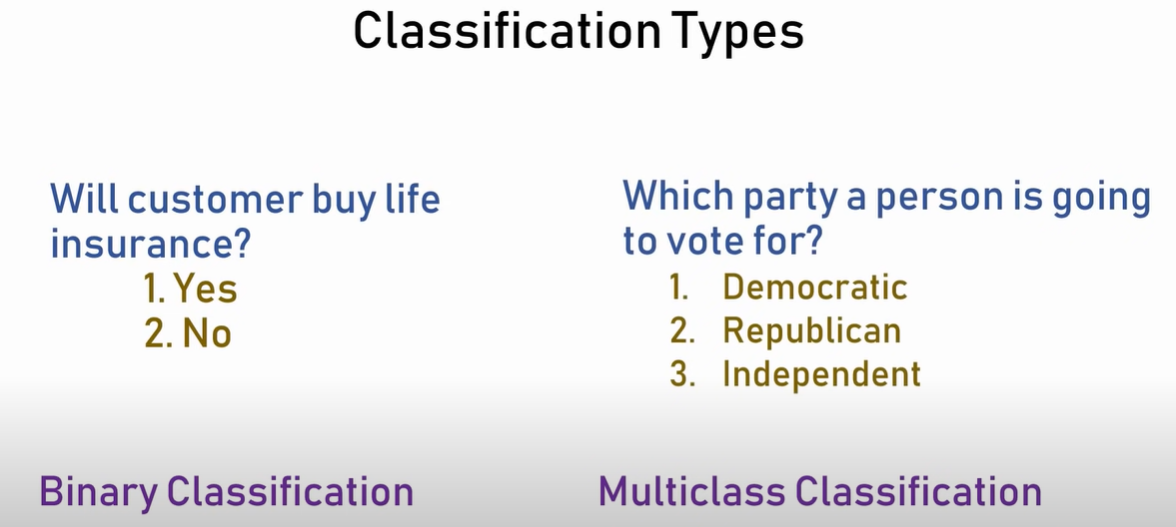

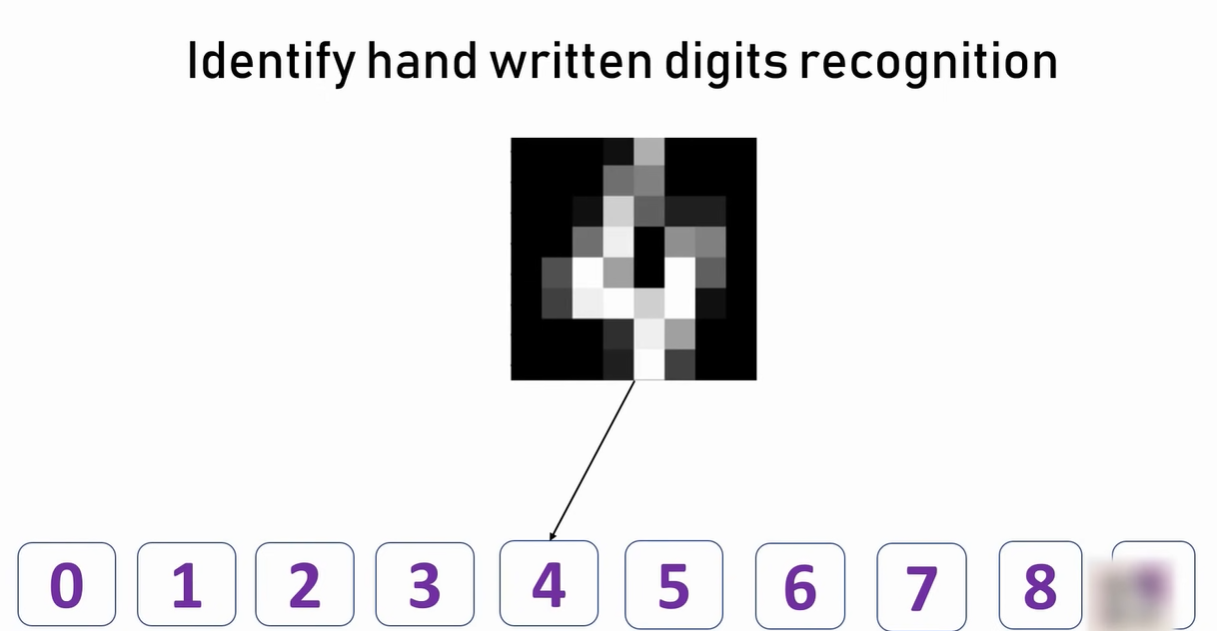

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [45]:
digits = load_digits()

In [46]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### data directory has numeric representation of the images
### images directory has the actual images

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [48]:
digits.data[0].shape

(64,)

### This 1D array represents the first image in the dataset, as the image shape is 8*8 as per the documentation, if we count the number of elementsv in this 1D array, it will be 64

<Figure size 640x480 with 0 Axes>

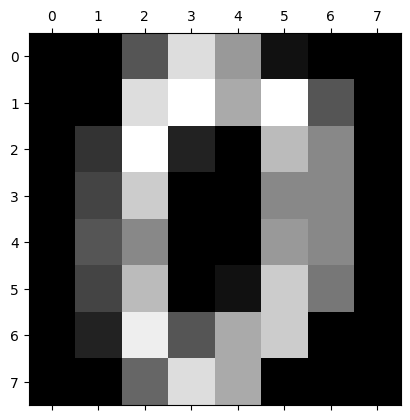

In [49]:
plt.gray()
plt.matshow(digits.images[0])

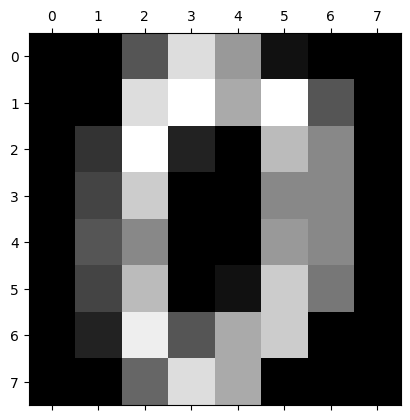

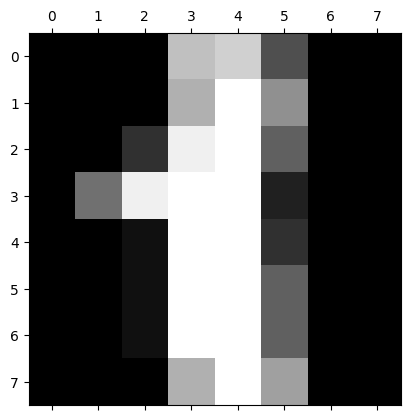

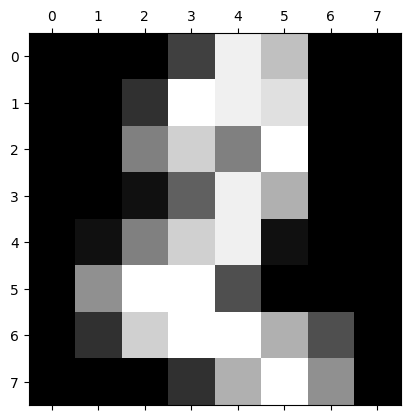

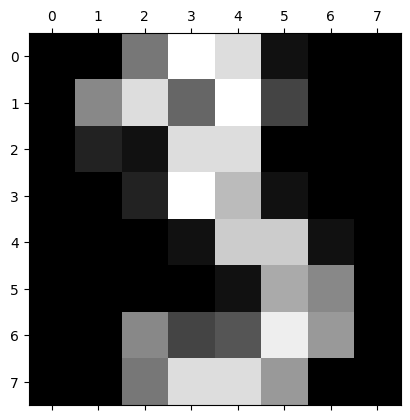

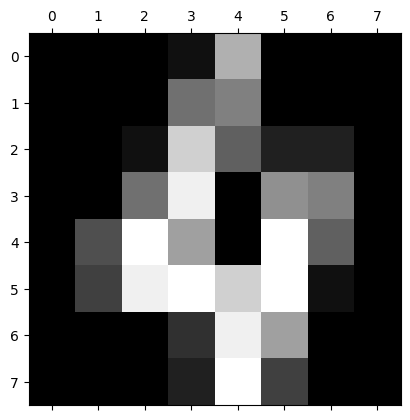

In [50]:
# to print first 5 images

for i in range(5):
    plt.matshow(digits.images[i])

In [51]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

### These are the target labels of the first five images that we displayed

### We can train our classification model using data and target

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [54]:
len(X_train)

1437

In [55]:
len(X_test)

360

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train,y_train)

c:\Users\OMOLP094\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
model.score(X_test,y_test)

0.9583333333333334

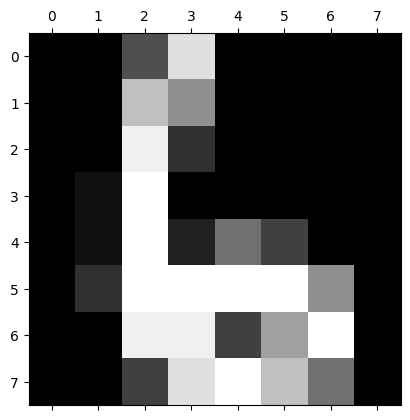

In [60]:
plt.matshow(digits.images[67])

In [61]:
digits.target[67]

6

In [62]:
model.predict([digits.data[67]]) # we need to pass the data as a tensor (multi dimensional array)

array([6])

In [63]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [64]:
y_predicted = model.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test, y_predicted)

In [67]:
cm

array([[31,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 38,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 35,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 29]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth Labels')

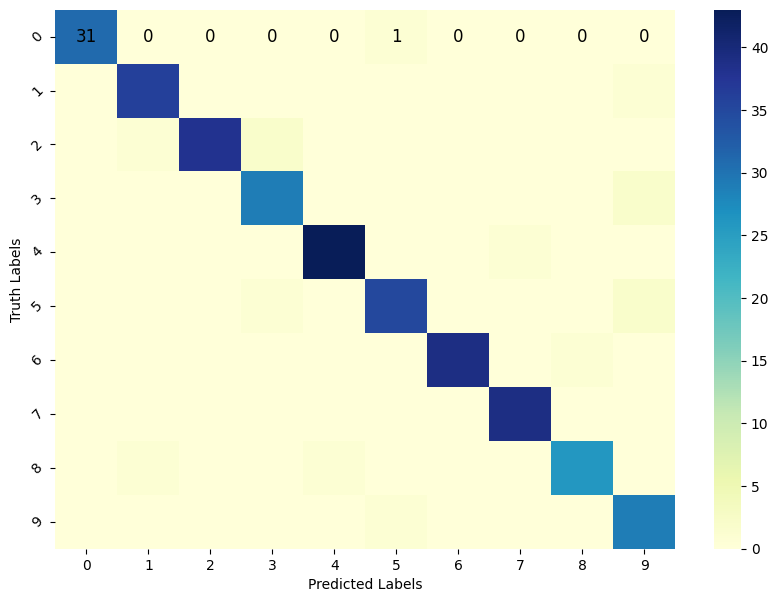

In [68]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='YlGnBu', annot_kws={"size": 12, "color": 'black'}) # adjust the cmap to a palette that has good contrast
# Rotate annotations
plt.yticks(rotation=45)  # Rotate y-axis labels if needed
plt.xlabel("Predicted Labels")
plt.ylabel("Truth Labels")

In [69]:
len(X_test)

360

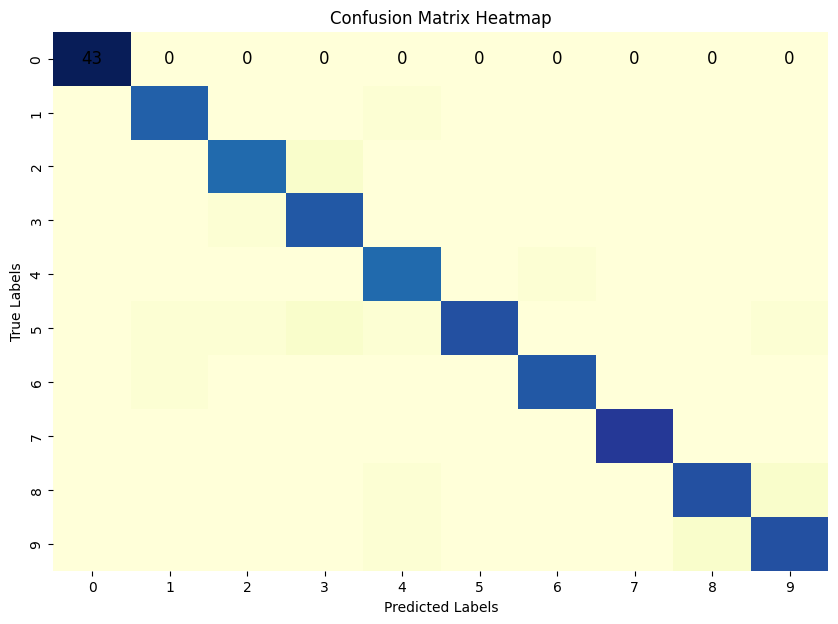

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                             [ 0, 32,  0,  0,  1,  0,  0,  0,  0,  0],
                             [ 0,  0, 31,  2,  0,  0,  0,  0,  0,  0],
                             [ 0,  0,  1, 33,  0,  0,  0,  0,  0,  0],
                             [ 0,  0,  0,  0, 31,  0,  1,  0,  0,  0],
                             [ 0,  1,  1,  2,  1, 34,  0,  0,  0,  1],
                             [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
                             [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
                             [ 0,  0,  0,  0,  1,  0,  0,  0, 34,  2],
                             [ 0,  0,  0,  0,  1,  0,  0,  0,  2, 34]])

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='d', cbar=False, annot_kws={"size": 12, "color": 'black'})

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [71]:
# Plotting confusion matrix
pred = model.predict(X_test)


matrix = confusion_matrix(y_test, pred)

plt.figure(figsize = (12, 6))
sns.heatmap(matrix, annot = True, cbar = False, fmt = 'd', cmap = 'Blues', xticklabels = digits.target_names, yticklabels = digits.target_names)
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Class', fontsize = 14)
plt.xticks(rotation = 30)
plt.ylabel('True Class', fontsize = 14)
plt.show()

TypeError: 'numpy.ndarray' object is not callable